# Load library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedKFold

In [2]:
import sys
import os

In [3]:
sys.path.append(os.getcwd() + '/../src')

In [4]:
os.getcwd() + '/../src'

'/home/quan/kwon/that_ds_library/nbs/../src'

# Load data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/dataset/main/diabetes.csv')
print(df.shape)
display(df.describe())

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Train test split and preprocessing for ML

In [7]:
from thatdslibrary.data_preprocessing import *

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.Outcome,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df.Outcome)

In [9]:
num_cols = df.columns[:-1].values
cat_cols = []
bi_cols= []
miss_cols = ['BloodPressure','SkinThickness']
# miss_cols=[]

In [10]:
X_train_processed,X_test_processed = preprocessing_general(X_train,X_test,num_cols=num_cols,
                                                   miss_cols=miss_cols,missing_vals=0)

In [11]:
X_train_processed.shape

(614, 8)

# Define Cross Validation

In [12]:
cv = StratifiedKFold(5)

# Machine Learning Model Experiments

In [13]:
from thatdslibrary.chart_plotting import *
from thatdslibrary.ml_helpers import *

## Decision Tree

<module 'matplotlib.pyplot' from '/home/quan/anaconda3/envs/testing/lib/python3.9/site-packages/matplotlib/pyplot.py'>

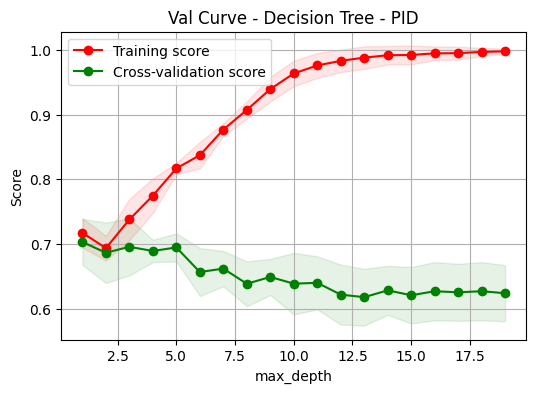

In [14]:
s='f1_macro'
dt = DecisionTreeClassifier(criterion='entropy',random_state=42,class_weight=None)
cv = StratifiedKFold(5)
plot_validation_curve(dt,'Val Curve - Decision Tree - PID',X_train_processed,y_train,
                      cv=cv,param_range=np.arange(1,20,1),param_name='max_depth',scoring=s,n_jobs=-1,figsize=(6,4))

This is the validation curve for hyperparameter max depth, which can be used to prune a decision tree. 

For max depth, we can observe the overfitting behavior when max depth is too high, which means the tree is able to make unlimited splits to the extreme of classifying each of the training data points correctly, thus failing to generalize. On the other hand, a small depth is enough to achieve a good CV score (from depth 1 to 5). This is a telling sign that some features have strong signals to predict diabetes than others.

In [15]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=42,class_weight=None,max_depth=3)
dt.fit(X_train_processed,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [16]:
viz = dtreeviz.model(dt,X_train_processed,y_train,target_name='diabetes',feature_names=X_train_processed.columns.values,
                   class_names=['no','yes'])

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

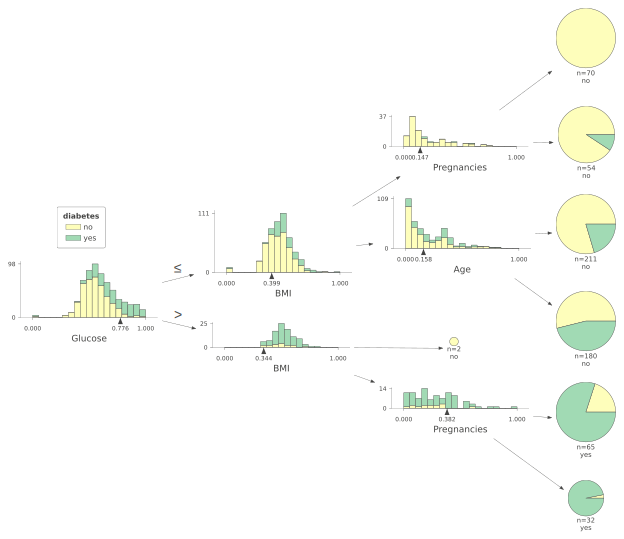

In [19]:
viz.view(depth_range_to_display=None,
         orientation='LR',
         instance_orientation='LR',fancy=True)

In [18]:
# dt = DecisionTreeClassifier(criterion='entropy',random_state=42,class_weight=None,max_depth=3)
# dt.fit(X_train_processed,y_train)

# plot_tree_dtreeviz(dt,X_train_processed,y_train,'diabetes',class_names=['no','yes'],
#                    fancy=True)

In [21]:
import matplotlib
matplotlib.font_manager.get_cachedir()

AttributeError: module 'matplotlib.font_manager' has no attribute 'get_cachedir'